In [1]:
#Project 3 part
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from matplotlib import pyplot as plt
from scipy import stats

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
from scipy import stats
import graphviz

def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
        
def read_data():
    '''
    Read data from the path provides!
    '''
    df = pd.read_csv("bottle.csv")  
    
    return df

def clean(df):
    '''
    Cleans the data!
    '''
    df = df[["T_degC", "Salnty"]]
    df.rename(columns={
        "T_degC": "Temperature(deg)",
        "Salnty": "Salinity"
    }, inplace=True)
    return df

def impute(df):
    """
    Functions to empute none values!
    """
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(method="ffill")
        
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    
    return df



def load_data():
    
    # Reading data
    df = read_data() 
    
    # Preprocessing data
    df = clean(df)
    
    df = impute(df)
    #df_cast = impute(df_cast)
    
    return df

# Loading the data
bottle_data = load_data()

# Looking at a data
bottle_data

C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\jason\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Temperature(deg),Salinity
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [2]:
bottle_data = bottle_data[:10000]
bottle_data

,Temperature(deg),Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
9995,15.71,33.640
9996,15.35,33.621
9997,14.64,33.510
9998,14.04,33.459


In [3]:
normalize_numeric_minmax(bottle_data,'Temperature(deg)')
normalize_numeric_minmax(bottle_data,'Salinity')
bottle_data

<ipython-input-1-3dbb2eed46d1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)


,Temperature(deg),Salinity
0,0.457210,0.386441
1,0.454865,0.386441
2,0.454865,0.385424
3,0.454279,0.379661
4,0.454279,0.380000
...,...,...
9995,0.762603,0.454237
9996,0.741501,0.447797
9997,0.699883,0.410169
9998,0.664713,0.392881


In [4]:
bottle_data.loc[(bottle_data['Temperature(deg)'] < .25), 'Temperature(deg)'] = -2
bottle_data.loc[(bottle_data['Temperature(deg)'] >= .25), 'Temperature(deg)'] = -1


bottle_data['Temperature(deg)'] = bottle_data['Temperature(deg)'].replace([-1], 'Hot')
bottle_data['Temperature(deg)'] = bottle_data['Temperature(deg)'].replace([-2], 'Not Hot')
bottle_data

C:\Users\jason\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\jason\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-4-cc53b7b3a76f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,Temperature(deg),Salinity
0,Hot,0.386441
1,Hot,0.386441
2,Hot,0.385424
3,Hot,0.379661
4,Hot,0.380000
...,...,...
9995,Hot,0.454237
9996,Hot,0.447797
9997,Hot,0.410169
9998,Hot,0.392881


In [5]:
#Setup the training and testing data.
numInstances = 10000
numTrain = 2000
numTest = numInstances - numTrain

#Create the training and testing datasets.
trainingData = bottle_data[:numTest]
testData = bottle_data[numTest:]

In [6]:
trainX = pd.DataFrame(trainingData, columns = ["Salinity"])
trainY = trainingData.drop(["Salinity"], axis = 1)

testX = pd.DataFrame(testData, columns = ["Salinity"])
testY = testData.drop(["Salinity"], axis = 1)

trainX

,Salinity
0,0.386441
1,0.386441
2,0.385424
3,0.379661
4,0.380000
...,...
7995,0.467797
7996,0.471186
7997,0.469831
7998,0.457966


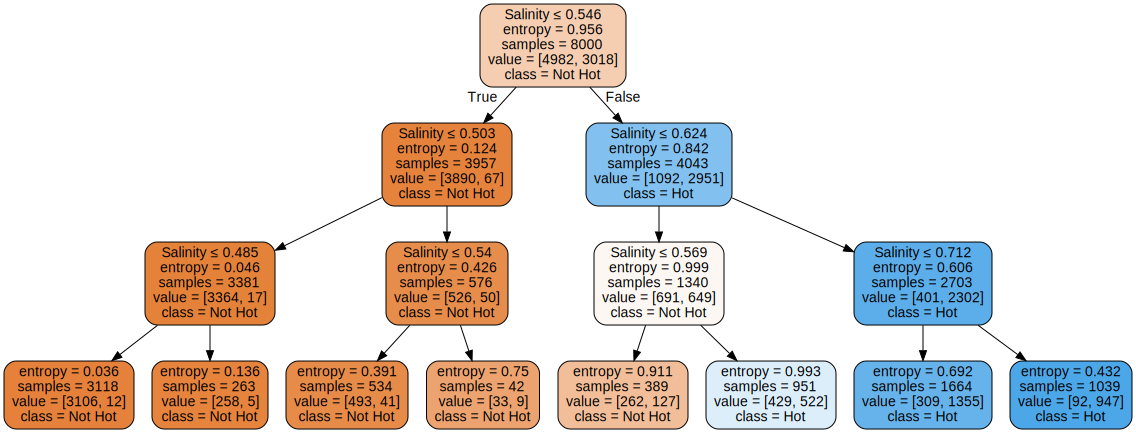

In [7]:
#Creating the Classification Tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) #We should keep an eye on the max depth to adjust the tree.
clf = clf.fit(trainX,trainY)


#Create the data for the graph
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = trainX.columns, class_names = ['Not Hot', 'Hot'],
                                filled = True, rounded = True, special_characters = True)
#Create the graph to display the data.
graph = graphviz.Source(dot_data)
graph

In [8]:
print("Accuracy = %f" % clf.score(testX,testY))

Accuracy = 0.899000


C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

0.9215

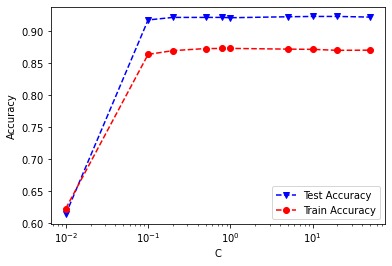

In [9]:
#Logistic Regression (With a parameter C.)
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

#Create two arrays for the logistic accuracy for both training and testing sets.
LRtestAcc = []
LRtrainAcc = []

#For loop to use each weight to predict the proper output. The less weight, the less that the datapoints in X influence the outcome.
for param in C:
  clf = LogisticRegression(C = param)
  clf.fit(testX,testY)
  log_reg_pred = clf. predict(testX)
  log_reg_pred_train = clf.predict(trainX)
  #print(log_reg_pred)
  LRtestAcc.append(accuracy_score(testY, log_reg_pred))
  LRtrainAcc.append(accuracy_score(trainY,log_reg_pred_train))

#Create a plot to visualize the logistic regression line and the accuracy of our models predictions.
plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

""" This works but for the sake of the tutorial we will be using the parameter instead.
clf = LogisticRegression(random_state = 0)
clf.fit(trainX, trainY)
"""
clf.score(testX, testY)

In [10]:
print("Accuracy = %f" % clf.score(testX,testY))

Accuracy = 0.921500


C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

Text(0, 0.5, 'Accuracy')

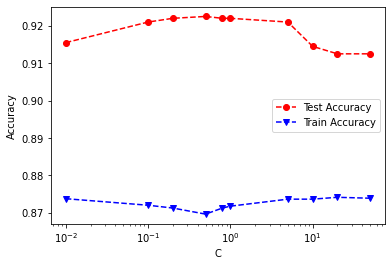

In [11]:
#SVM Non Linear Example
#Creating the arrays for the accuracy of the test and trainning sets.
SVMLtestAcc = [] 
SVMLtrainAcc = []

#predY = clf.predict(testX)
#print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

#For loop to iterate each weight we place on the models data.
for param in C:
   clf = SVC(C=param, kernel='rbf', gamma='auto') 
   clf.fit(trainX,trainY) 
   svml_pred = clf.predict(testX) 
   svml_pred_train = clf.predict(trainX)
   SVMLtestAcc.append(accuracy_score(testY, svml_pred)) 
   SVMLtrainAcc.append(accuracy_score(trainY,svml_pred_train))

plt.plot(C, SVMLtestAcc,'ro--', C,SVMLtrainAcc,'bv--') 
plt.legend(['Test Accuracy','Train Accuracy']) 
plt.xlabel('C') 
plt.xscale('log') 
plt.ylabel('Accuracy')

In [12]:
print("Accuracy = %f" % clf.score(testX,testY))

Accuracy = 0.912500


In [13]:
#---Naive Bayes---

clf_NB = GaussianNB()
clf_NB.fit(trainX,trainY)
NB_pred = clf_NB.predict(testX)
print('Accuracy on test data is %.2f' % (accuracy_score(testY, NB_pred)))


Accuracy on test data is 0.91


C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0, 0.5, 'Accuracy')

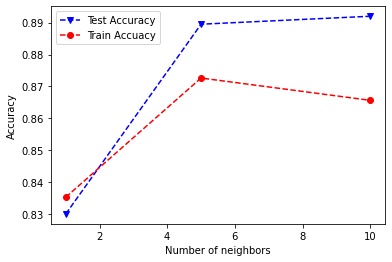

In [14]:
#K Nearest Neighbor
numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(trainX, trainY)
    knn_pred = clf.predict(testX)
    knn_pred_train = clf.predict(trainX)
    testAcc.append(accuracy_score(testY, knn_pred))
    trainAcc.append(accuracy_score(trainY,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')


In [15]:
print("Accuracy = %f" % clf.score(testX,testY))

Accuracy = 0.892000
